<a href="https://colab.research.google.com/github/allen44/riiid-test-answer-prediction/blob/main/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
from sklearn.metrics import roc_auc_score, plot_confusion_matrix
from sklearn.model_selection import cross_val_score

# % pip install featuretools sklearn_pandas

%cd /content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/
%pwd


/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction


'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction'

#Import the data - pre-split into train and test sets


In [2]:
suffix = '.pkl.gzip'
pwd = '/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction'

# #Define data paths
X_train = pd.read_pickle(f'{pwd}/data/intermediate/feature_engineered/X_train{suffix}')
y_train = pd.read_pickle(f'{pwd}/data/intermediate/feature_engineered/y_train{suffix}')

X_test = pd.read_pickle(f'{pwd}/data/intermediate/feature_engineered/X_test{suffix}')
y_test = pd.read_pickle(f'{pwd}/data/intermediate/feature_engineered/y_test{suffix}')

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((9773, 13029), (9773,), (9770, 13029), (9770,))

In [3]:
# Change the splits from df to np.arrays
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# Check the shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9773, 13029), (9770, 13029), (9773,), (9770,))

# Baseline Modelling

## Store the best metrics and best paramters for each model

In [4]:
# Best parameters and best scores
scores = {}
best_params = {}
preds = {}
pred_probas = {}
gs_results = {}

In [5]:
best_model = {}

In [6]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Average Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

# # Calling Method 
# plot_grid_search(pipe_grid.cv_results_, n_estimators, max_features, 'N Estimators', 'Max Features')

## Decision Tree

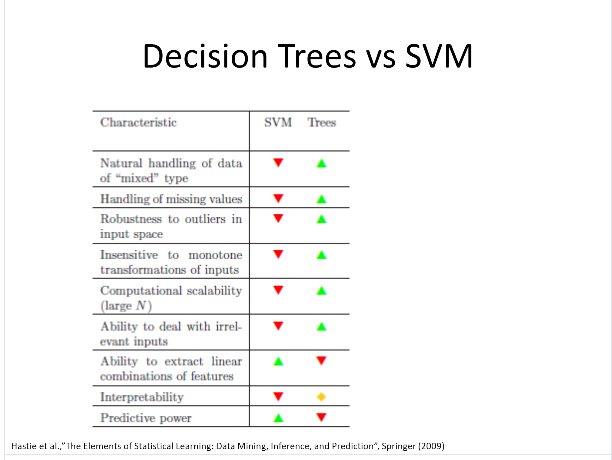




Decision trees pros:

* good at handling mixed dtypes,
* good at handling missing values,
* robust to outliers in inputs,
* insensative to monotone transformations of inputs,
* computationally efficient at large data sets,
* insensative to colinearrity of features

Decision tree cons:
* Low predictive power
* Can't extract linear combinations of features,
* Large trees are difficult to interpret

In [7]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

model_long_name = "Decision Tree"
model_str = 'dt'
param_1 = 'max_depth'
param_2 = 'criterion'

# Instantiate classifier object
model= tree.DecisionTreeClassifier()

# Set parameter grid
class_weight = ['balanced']
criterion = ['gini']
max_depth = [i for i in range(2,10)]

param_grid = {'class_weight': class_weight,
              'criterion': criterion ,
              'max_depth': max_depth}
gs = GridSearchCV(model, 
                  param_grid, 
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=-1, 
                  verbose=3)
          
# Fit classifier
gs.fit(X_train, y_train)

# Save the CV search results: scores and parameters
best_params[model_str] = gs.best_params_
scores[model_str] = gs.best_score_
gs_results[model_str] = gs.cv_results_

# Print the scores and parameters
print(f"Best Params: {best_params[model_str]}")
print(f"Best CV Score: {scores[model_str]:0.4f}")

# Set the best parameters in the the classifier and fit the train data
model.set_params(**best_params[model_str]) 
model.fit(X_train, y_train)

# # Predict the labels on the test data
# y_pred = model.predict(X_test, y_test)
# y_pred_proba = model.predict_proba(X_test, y_test)

# # Save the predictions
# preds[model_str] = y_pred
# pred_probas[model_str] = y_pred_proba

# Save the model and gridsearch objects
from joblib import dump, load
import datetime
model_save_path = f'{pwd}/models/{datetime.datetime.now():%Y-%m-%d %H%M} {model_long_name}'
dump(model, f'{model_save_path} Model object.joblib')
dump(gs, f'{model_save_path} Grid Search object.joblib')

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 11.7min finished


Best Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 9}
Best CV Score: 0.7138


NameError: ignored

['/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-03-12 2246 Decision Tree Grid Search object.joblib']

In [ ]:
# # Load cv data
# from joblib import dump, load

# model_long_name = "Decision Tree"
# model_str = 'dt'
# param_1 = 'max_depth'
# param_2 = 'criterion'

# with open('/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-02-26 2326Decision Tree Model object.joblib', 'rb') as f:
#   model = load(f)
# with open('/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-02-26 2326Decision Tree Grid Search object.joblib', 'rb') as f:
#   gs = load(f)



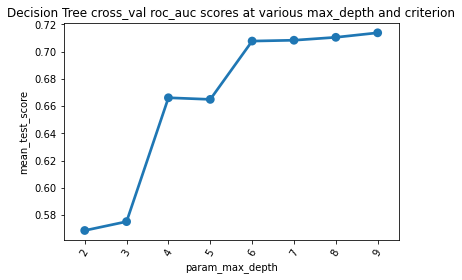

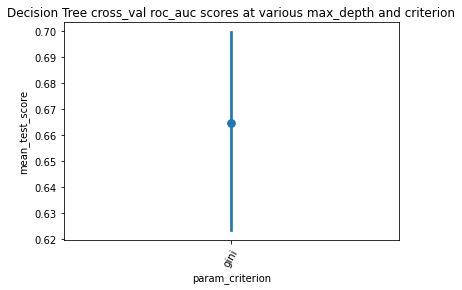

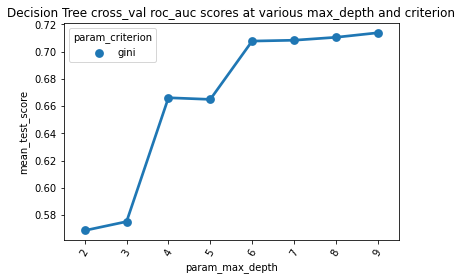

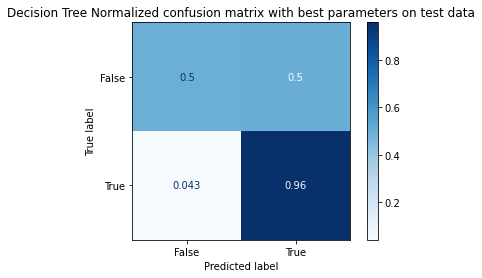

In [9]:
# Plot parameter search results
model.fit(X_train, y_train)
cv_results = pd.DataFrame(gs.cv_results_)

plt.figure()
sns.pointplot(data=cv_results,
              x= f'param_{param_1}',
              y= 'mean_test_score',
              dodge=True)
plt.xticks(rotation=60)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

plt.figure()
sns.pointplot(data=cv_results,
              x= f'param_{param_2}',
              y= 'mean_test_score',
              dodge=True)
plt.xticks(rotation=60)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

plt.figure()
sns.pointplot(data=cv_results,
              x= f'param_{param_1}',
              y= 'mean_test_score',
              hue=f'param_{param_2}',
              dodge=True)
plt.xticks(rotation=60)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

# Plot normalized confusion matrix
disp = plot_confusion_matrix(model, X_test, y_test,
                              cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(f"{model_long_name} Normalized confusion matrix with best parameters on test data")
plt.show()
 


## Random Forest

Pros:

* High predictive power
* Good at handling mixed dtypes,
* Good at handling missing values,
* Robust to outliers in inputs,
* Insensative to monotone transformations of inputs,
* Insensative to colinearrity of features

Cons:

* less efficient at large data sets, 
* the complete forest is difficult to interpret

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_long_name = "Random Forest"
model_str = 'rf'
param_1 = 'n_estimators'
param_2 = 'max_depth'


# Instantiate classifier object
model = RandomForestClassifier()

# Set parameter grid and instantiate GridSearchCV object
param_grid = {'class_weight': ['balanced'],
              # 'criterion': 'gini',
              'n_estimators': list(set(np.logspace(-0.01, 3, 5, dtype=int))),
              'max_depth': [2, 3, 4]
              }

gs = GridSearchCV(model, 
                  param_grid, 
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=-1, 
                  verbose=3)
    
# Fit classifier
gs.fit(X_train, y_train)

# Save the CV search results: scores and parameters
best_params[model_str] = gs.best_params_
scores[model_str] = gs.best_score_
gs_results[model_str] = gs.cv_results_

# Print the scores and parameters
print(f"Best Params: {best_params[model_str]}")
print(f"Best CV Score: {scores[model_str]:0.4f}")

# Set the best parameters in the the classifier and fit the train data
model.set_params(**best_params[model_str]) 
model.fit(X_train, y_train)

# # Predict the labels on the test data
# y_pred = model.predict(X_test, y_test)
# y_pred_proba = model.predict_proba(X_test, y_test)

# # Save the predictions
# preds[model_str] = y_pred
# pred_probas[model_str] = y_pred_proba

# Save the model and gridsearch objects
from joblib import dump, load
import datetime
model_save_path = f'{pwd}/models/{datetime.datetime.now():%Y-%m-%d %H%M} {model_long_name}'
dump(model, f'{model_save_path} Model object.joblib')
dump(gs, f'{model_save_path} Grid Search object.joblib')

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.7min


In [ ]:
# # Load cv data
# from joblib import dump, load

# model_long_name = "Random Forest"
# model_str = 'rf'
# param_1 = 'n_estimators'
# param_2 = 'max_depth'

# with open(f'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-02-27 0200Random Forest Model object.joblib', 'rb') as f:
#   model = load(f)
# with open(f'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-02-27 0200Random Forest Grid Search object.joblib', 'rb') as f:
#   gs = load(f)

In [ ]:
# model.fit(X_train, y_train)

cv_results = pd.DataFrame(gs.cv_results_)

# Plot parameter search results
plt.figure()
sns.pointplot(data=cv_results,
              x= f'param_{param_1}',
              y= 'mean_test_score',
              dodge=True)
plt.xticks(rotation=60)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

plt.figure()
sns.pointplot(data=cv_results,
              x= f'param_{param_2}',
              y= 'mean_test_score',
              dodge=True)
plt.xticks(rotation=60)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

plt.figure()
sns.pointplot(data=cv_results,
              x= f'param_{param_1}',
              y= 'mean_test_score',
              hue=f'param_{param_2}',
              dodge=True)
plt.xticks(rotation=60)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

# plt.figure()
# sns.pointplot(data=cv_results,
#               x= f'param_{param_2}',
#               y= 'mean_test_score',
#               hue=f'param_{param_1}',
#               dodge=True)
# plt.xticks(rotation=60)
# plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')


# Plot normalized confusion matrix
disp = plot_confusion_matrix(model, X_test, y_test,
                              cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(f"{model_long_name} Normalized confusion matrix with best parameters on test data")
plt.show()

## Principle Component Analysis

Before continuing with more modelling, let's do some PCA to reducing the number of features in the models.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
pca.fit(X_train)

print(pca.explained_variance_ratio_)
print(f"pca.explained_variance_ratio_.sum():  {pca.explained_variance_ratio_.sum()}")
# print(pca.singular_values_)


It appears that PCA is not effective on this data. The 10 most important features explain 59% of variance, but the 100 most important features only explain 64% of variance.

## More extensive Modeling

### Logistic Regression Classifier

Pros:

* Logistic regression is easier to implement, interpret, and very efficient to train.	

* It makes no assumptions about distributions of classes in feature space.	

* It can easily extend to multiple classes(multinomial regression) and a natural probabilistic view of class predictions.	

* It not only provides a measure of how appropriate a predictor(coefficient size)is, but also its direction of association (positive or negative).	

* It is very fast at classifying unknown records.	

* Good accuracy for many simple data sets and it performs well when the dataset is linearly separable.

* It can interpret model coefficients as indicators of feature importance.	

* Logistic regression is less inclined to over-fitting but it can overfit in high dimensional datasets.One may consider Regularization (L1 and L2) techniques to avoid over-fittingin these scenarios.



Cons: 

* If the number of observations is lesser than the number of features, Logistic Regression should not be used, otherwise, it may lead to overfitting.

* It only constructs linear boundaries.

* The major limitation of Logistic Regression is the assumption of linearity between the dependent variable and the independent variables.


* It can only be used to predict discrete functions. Hence, the dependent variable of Logistic Regression is bound to the discrete number set.

* Non-linear problems can’t be solved with logistic regression because it has a linear decision surface. Linearly separable data is rarely found in real-world scenarios.

* Logistic Regression requires average or no multicollinearity between independent variables.

* It is tough to obtain complex relationships using logistic regression. More powerful and compact algorithms such as Neural Networks can easily outperform this algorithm.

* In Linear Regression independent and dependent variables are related linearly. But Logistic Regression needs that independent variables are linearly related to the log odds (log(p/(1-p)).


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

model_long_name = 'Linear Regression Classifier'
model_str = 'log_reg'
param_1 = 'C'
param_2 = 'l1_ratio'

# Instantiate classifier object
model = LogisticRegression(solver='saga',
                            penalty='elasticnet',
                            class_weight='balanced')

# Parameters
param_grid = {'C': np.logspace(-3, 3, 10),
              'l1_ratio': [0.25, 0.5, 0.75],
              # 'l1_ratio': np.logspace(-3, 0, 10)
              }

# Fit classifier
gs = GridSearchCV(model, param_grid,
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=-1, 
                  verbose=3)
gs.fit(X_train, y_train)

# Save the CV search results: scores and parameters
best_params[model_str] = gs.best_params_
scores[model_str] = gs.best_score_
gs_results[model_str] = gs.cv_results_

# Print the scores and parameters
print(f"Best Params: {best_params[model_str]}")
print(f"Best CV Score: {scores[model_str]:0.4f}")

# Set the best parameters in the the classifier and fit the train data
model.set_params(**best_params[model_str]) 
model.fit(X_train, y_train)

# # Predict the labels on the test data
# y_pred = model.predict(X_test, y_test)
# y_pred_proba = model.predict_proba(X_test, y_test)

# # Save the predictions
# preds[model_str] = y_pred
# pred_probas[model_str] = y_pred_proba

# Save the model and gridsearch objects
from joblib import dump, load
import datetime
model_save_path = f'{pwd}/models/{datetime.datetime.now():%Y-%m-%d %H%M} {model_long_name}'
dump(model, f'{model_save_path} Model object.joblib')
dump(gs, f'{model_save_path} Grid Search object.joblib')

In [ ]:
# # Load model and cv data
# from joblib import dump, load

# model_long_name = 'Linear Regression Classifier'
# model_str = 'log_reg'
# param_1 = 'C'
# param_2 = 'l1_ratio'

# with open(f'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-02-27 2039 Linear Regression Classifier Model object.joblib', 'rb') as f:
#   model = load(f)
# with open(f'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-02-27 2039 Linear Regression Classifier Grid Search object.joblib', 'rb') as f:
#   gs = load(f)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


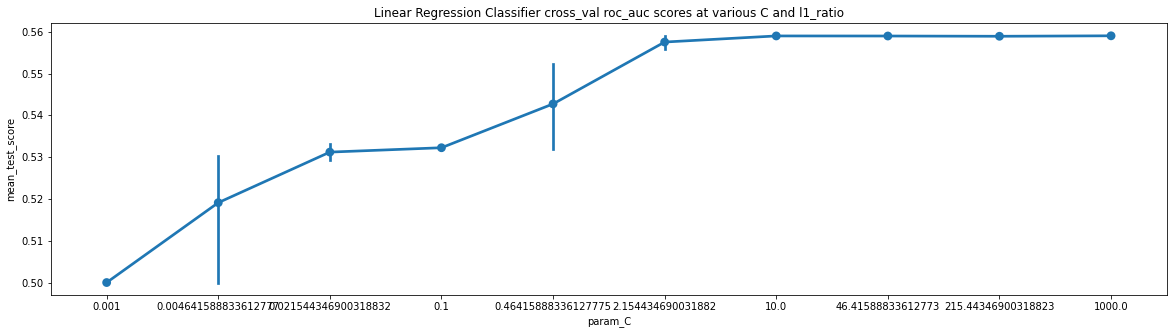

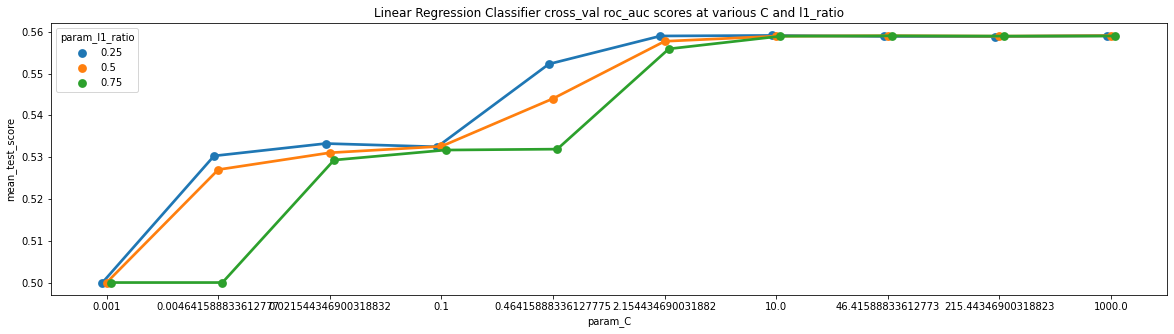

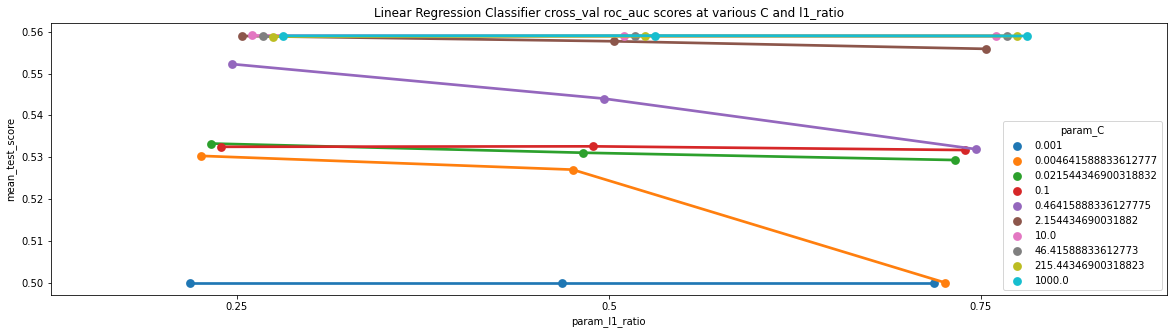

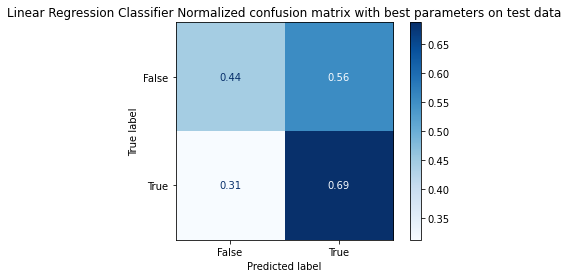

In [ ]:
# model.fit(X_train, y_train)

# Plot parameter search results
cv_results= pd.DataFrame(gs.cv_results_)

plt.figure(figsize=(20, 5))
sns.pointplot(data=cv_results,
              x='param_'+ param_1,
              y= 'mean_test_score',
              dodge=True)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

plt.figure(figsize=(20, 5))
sns.pointplot(data=cv_results,
              x='param_'+ param_1,
              y= 'mean_test_score',
              hue='param_'+ param_2,
              dodge=True)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

plt.figure(figsize=(20, 5))
sns.pointplot(data=cv_results,
              x='param_'+ param_2,
              y= 'mean_test_score',
              hue='param_'+ param_1,
              dodge=True)
plt.title(f'{model_long_name} cross_val roc_auc scores at various {param_1} and {param_2}')

# Plot normalized confusion matrix
model.fit(X_train, y_train)
disp = plot_confusion_matrix(model, X_test, y_test,
                              cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(f"{model_long_name} Normalized confusion matrix with best parameters on test data")
plt.show()

Based on these plots, we see that 

* param_C is best at 10,
* and param_l1_ratio does not matter.

We'll set the parameters to C=10, l1_ratio=0.5

That's a pretty bad score for a baseline model. It's good in training, and terrible in test.


## LightGBM

### When to use LightGBM

* You have a large number of training samples
* Greater than 1000 training samples and less 100 features
* The number of features < number of training samples
* You have a mixture of categorical and numeric features Or just numeric features

### When to NOT use LightGBM 

* Another best-in-class algorithm is already known to be well suited for the task (such as neural nets for computer vision and natural language processing and understanding problems)
* When the number of training samples is significantly smaller than the number of features

Our data sets has about as many features as there are entries. LightGBM is not an ideal model for this data, unless we do some major dimensionality reduction.


In [ ]:
from lightgbm import LGBMClassifier

model_long_name = 'LGBM'
model_str = 'lgbm'
param_1 = 'max_depth'
param_2 = 'num_leaves'
param_3 = 'n_estimators'

# Instantiate the classifier object
model = LGBMClassifier(
    class_weight = 'balanced',
    min_child_samples = 1000, 
    subsample=0.7, 
    subsample_freq=5,
    n_jobs= -1,
    is_higher_better = True,
    first_metric_only = True
)

# Parameters
param_grid = {'num_leaves': list(set(np.logspace(np.log10(10),np.log10(1000), 10, dtype=int))),
              'max_depth': list(set(np.logspace(np.log10(1),np.log10(10), 10, dtype=int))),
              'n_estimators': list(set(np.logspace(np.log10(10),np.log10(1000), 10, dtype=int)))
              }

# Fit classifier
gs = GridSearchCV(model, param_grid,
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=-1, 
                  verbose=3)
gs.fit(X_train, y_train)

# Save the CV search results: scores and parameters
best_params[model_str] = gs.best_params_
scores[model_str] = gs.best_score_
gs_results[model_str] = gs.cv_results_

# Print the scores and parameters
print(f"Best Params: {best_params[model_str]}")
print(f"Best CV Score: {scores[model_str]:0.4f}")

# Set the best parameters in the the classifier and fit the train data
model.set_params(**best_params[model_str]) 
model.fit(X_train, y_train)


# Save the model and gridsearch objects
from joblib import dump, load
import datetime

model_save_path = f'{pwd}/models/{datetime.datetime.now():%Y-%m-%d %H%M} {model_long_name}'
dump(model, f'{model_save_path} Model object.joblib')
dump(gs, f'{model_save_path} Grid Search object.joblib')


In [ ]:
# Load model and cv data
from joblib import dump, load

model_long_name = 'LGBM'
model_str = 'lgbm'
param_1 = 'max_depth'
param_2 = 'num_leaves'
param_3 = 'n_estimators'

with open('/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-02-27 2311 LGBM Model object.joblib', 'rb') as f:
  model = load(f)
with open('/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/2021-02-27 2311 LGBM Grid Search object.joblib', 'rb') as f:
  gs = load(f)

In [ ]:
gs_results[model_str] = gs.cv_results_
cv_results = pd.DataFrame(gs_results[model_str])

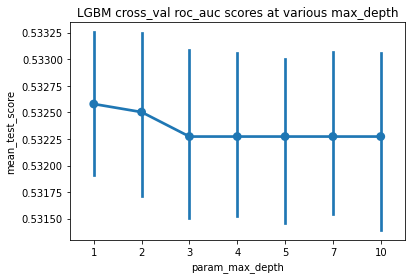

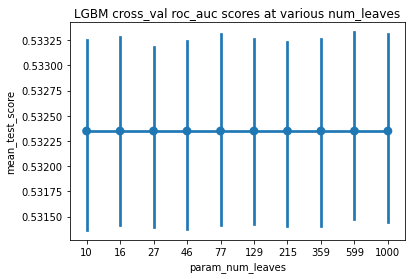

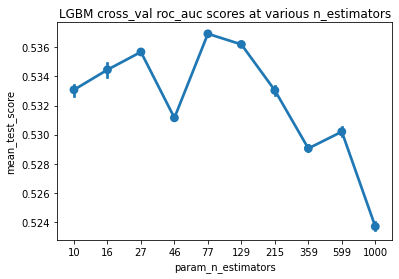

In [ ]:
# Plot parameter search results

for param in [param_1, param_2, param_3]:
  plt.figure()
  cv_results = pd.DataFrame(gs.cv_results_)
  sns.pointplot(data=cv_results,
                x=f'param_{param}',
                y= 'mean_test_score',
                dodge=True)
  plt.title(f'{model_long_name} cross_val roc_auc scores at various {param}')

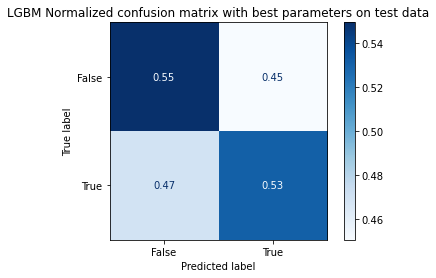

In [ ]:
# Plot normalized confusion matrix
model.fit(X_train, y_train)
disp = plot_confusion_matrix(model, X_test, y_test,
                              cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title(f"{model_long_name} Normalized confusion matrix with best parameters on test data")
plt.show()

We see that the LGBM baseline is better than the logistic regression model baseline, but not much better.

## K-Nearest-Neighbors Classifier

 K-Nearest-Neighbors Classifier is not a good choice for a model. KNN requires that each feature be continuous, but our categorical features are discrete.

## Section Summary: 




We found that the various models did not perfrorm well with the raw data set. Let's try some feature engineering to guide the models in focusing on the important features.



# Baseline model with feature engineering

Using the results of my feature engineering notebook, we can see if the same models from above can predict better with a feature-engineered subsample.

## Store the best metrics and best parameters for each model

In [ ]:
# Best parameters and best scores
scores = {}
best_params = {}
preds = {}
pred_probas = {}
gs_results = {}

In [ ]:
best_model = {}

## Decision Tree

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:  1.8min finished


Best Params: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2}
Best CV Score: 0.9994


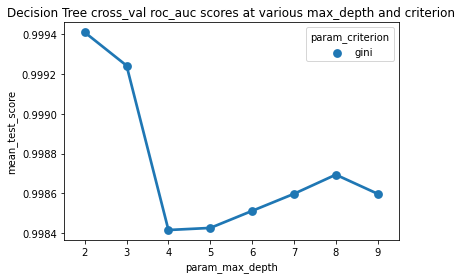

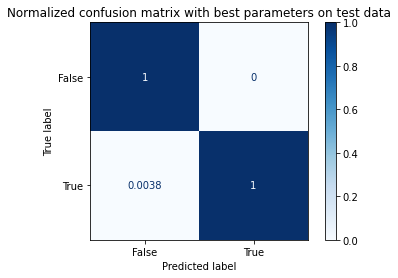

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

model_long_name = "Decision Tree"
model_str = 'dt'

# Instantiate classifier object
model= tree.DecisionTreeClassifier()

# Set parameter grid
class_weight = ['balanced']
criterion = ['gini']
max_depth = [i for i in range(2,10)]

param_grid = {'class_weight': class_weight,
              'criterion': criterion ,
              'max_depth': max_depth}
gs = GridSearchCV(model, 
                  param_grid, 
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=-1, 
                  verbose=3)
          
# Fit classifier
gs.fit(X_train, y_train)

# Save the CV search results: scores and parameters
best_params[model_str] = gs.best_params_
scores[model_str] = gs.best_score_
gs_results[model_str] = gs.cv_results_

# Print the scores and parameters
print(f"Best Params: {best_params[model_str]}")
print(f"Best CV Score: {scores[model_str]:0.4f}")

# Set the best parameters in the the classifier and fit the train data
model.set_params(**best_params[model_str]) 
model.fit(X_train, y_train)

# # Predict the labels on the test data
# y_pred = model.predict(X_test, y_test)
# y_pred_proba = model.predict_proba(X_test, y_test)

# # Save the predictions
# preds[model_str] = y_pred
# pred_probas[model_str] = y_pred_proba

# Save the model and gridsearch objects
from joblib import dump, load
import datetime
dump(model, Path(f'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/{datetime.datetime.now():%Y-%m-%d %H%M} {model_long_name} Model object - feature-engineered-data.joblib'))
dump(gs, Path(f'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/{datetime.datetime.now():%Y-%m-%d %H%M} {model_long_name} Grid Search object - feature-engineered-data.joblib'))

# Plot parameter search results
cv_results = pd.DataFrame(gs.cv_results_)

sns.pointplot(data=cv_results,
              x='param_max_depth',
              y= 'mean_test_score',
              hue='param_criterion',
              dodge=True)
plt.title(f'{model_long_name} cross_val roc_auc scores at various max_depth and criterion')

# Plot normalized confusion matrix
disp = plot_confusion_matrix(dt, X_test, y_test,
                              cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title("Normalized confusion matrix with best parameters on test data")
plt.show()




## Random Forest



Fitting 5 folds for each of 129 candidates, totalling 645 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 24.5min
[Parallel(n_jobs=-1)]: Done 645 out of 645 | elapsed: 35.0min finished


Best Params: {'class_weight': 'balanced', 'max_depth': 4, 'n_estimators': 119}
Best CV Score: 1.0000


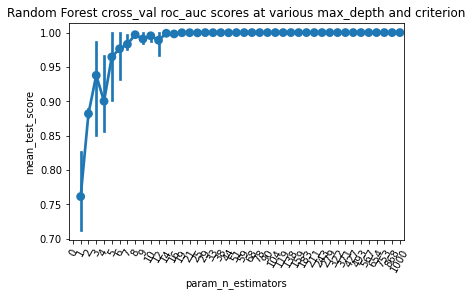

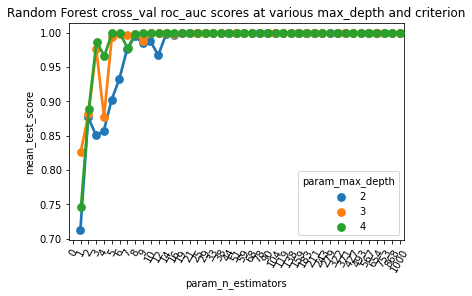

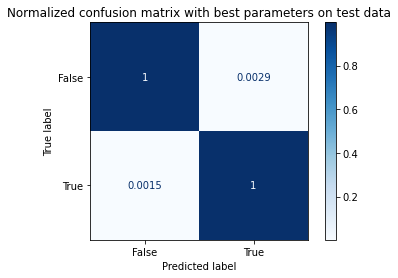

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_long_name = "Random Forest"
model_str = 'rf'

# Instantiate classifier object
rf = RandomForestClassifier()

# Set parameter grid and instantiate GridSearchCV object
param_grid = {'class_weight': ['balanced'],
              # 'criterion': 'gini',
              'n_estimators': list(set(np.logspace(-0.01, 3, 50, dtype=int))),
              'max_depth': [2, 3, 4]
              }

gs = GridSearchCV(rf, 
                  param_grid, 
                  scoring='roc_auc',
                  cv=5,
                  n_jobs=-1, 
                  verbose=3)
    
# Fit classifier
gs.fit(X_train, y_train)

# Save the CV search results: scores and parameters
best_params[model_str] = gs.best_params_
scores[model_str] = gs.best_score_
gs_results[model_str] = gs.cv_results_

# Print the scores and parameters
print(f"Best Params: {best_params[model_str]}")
print(f"Best CV Score: {scores[model_str]:0.4f}")

# Set the best parameters in the the classifier and fit the train data
rf.set_params(**best_params[model_str]) 
rf.fit(X_train, y_train)

# # Predict the labels on the test data
# y_pred = rf.predict(X_test, y_test)
# y_pred_proba = rf.predict_proba(X_test, y_test)

# # Save the predictions
# preds[model_str] = y_pred
# pred_probas[model_str] = y_pred_proba

# Save the model and gridsearch objects
from joblib import dump, load
import datetime
dump(rf, Path(f'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/{datetime.datetime.now():%Y-%m-%d %H%M}Random Forest Model object - feature-engineered-data.joblib'))
dump(gs, Path(f'/content/drive/MyDrive/Colab Notebooks/riiid-test-answer-prediction/models/{datetime.datetime.now():%Y-%m-%d %H%M}Random Forest Grid Search object - feature-engineered-data.joblib'))

# Plot parameter search results
cv_results = pd.DataFrame(gs.cv_results_)
sns.pointplot(data=cv_results,
              x='param_n_estimators',
              y= 'mean_test_score',
              dodge=True)
plt.xticks(rotation=60)
plt.title('Random Forest cross_val roc_auc scores at various max_depth and criterion')

# Plot parameter search results
plt.figure()
cv_results = pd.DataFrame(gs.cv_results_)
sns.pointplot(data=cv_results,
              x='param_n_estimators',
              y= 'mean_test_score',
              hue='param_max_depth',
              dodge=True)
plt.xticks(rotation=60)
plt.title('Random Forest cross_val roc_auc scores at various max_depth and criterion')

# Plot normalized confusion matrix
disp = plot_confusion_matrix(rf, X_test, y_test,
                              cmap=plt.cm.Blues,
                             normalize='true')
disp.ax_.set_title("Normalized confusion matrix with best parameters on test data")
plt.show()

Based on the results above, we can see that the models are overfitting, likely due to leaks of the test data into the training set during feature engineering.

# Conclusion


## Performace vs hyperparameters for each model

### Decision tree


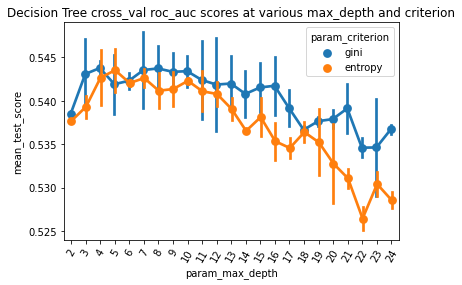

We found that performance was maximixed for max_depth between 2 and 4. 

Also, we see that criterion 'gini' is superior to 'entropy'.



### Random Forest

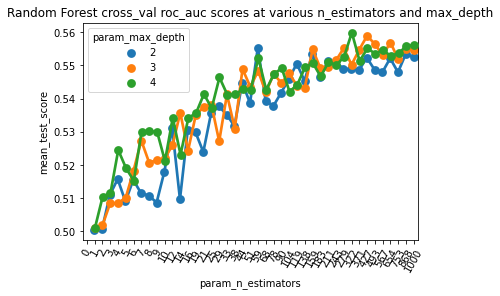


We find that performance is maximized with max_depth of 4, 

and n_estimators of 150 to 400.


### Logistic Regression

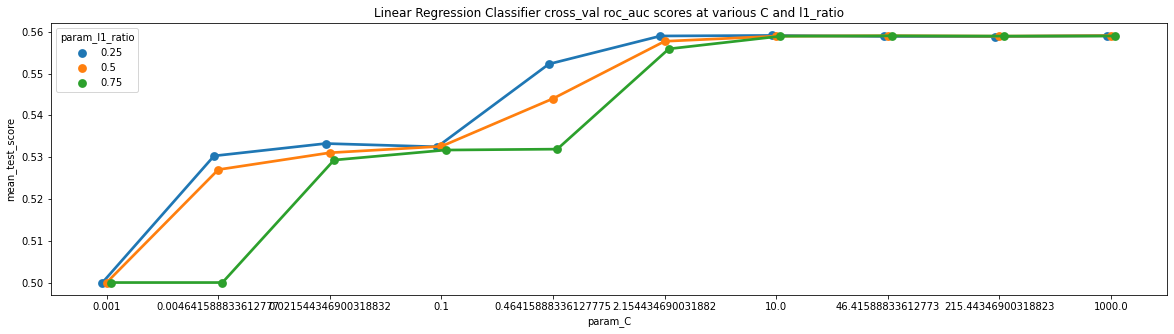

We find that performace is maximized for:

* C between 0.4 and 2,

* l1_ratio of 0.25




### LightGBM

We find the best hyperparametere are:

* max depth: 1 or 2,

* n_estimators: 16 to 77,

* num_leaves: any,



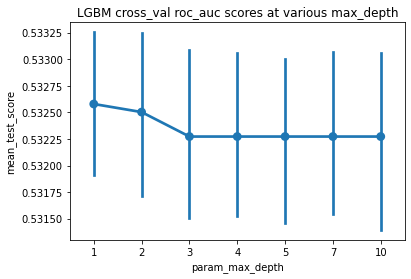

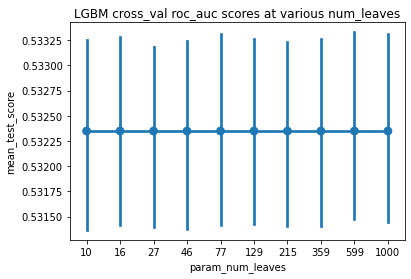

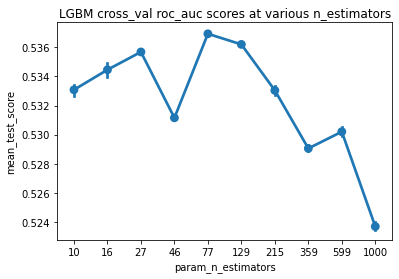


## Comparing raw data vs feature-engineered data
Using the raw data we can reach some conlusions of the quality of the models. With the current feature-engineered data, we cannot determine anything about the quality of our models, do to mishandling of the train and test data sets in the process. Both tested models display extreme overfitting on the train data (auc_score > 0.999).

We can see the confusion matrix of one of these leaked-test-data models.


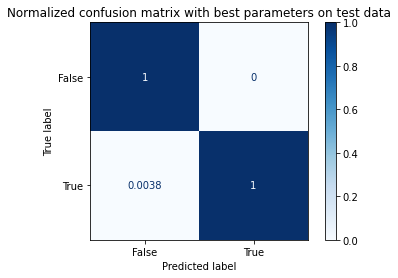


## Comparing the models on non-feature-engineered data only


### Decision tree


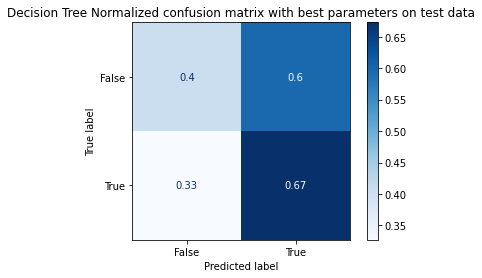

### Random Forest

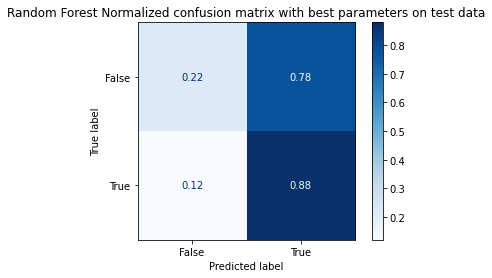

### Logistic Regression

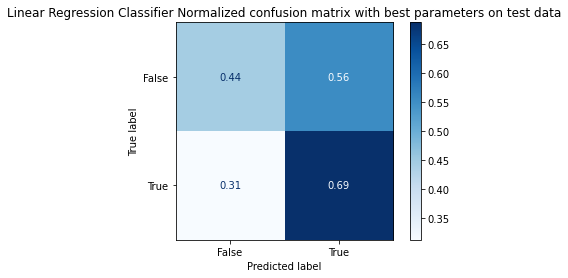


### LightGBM

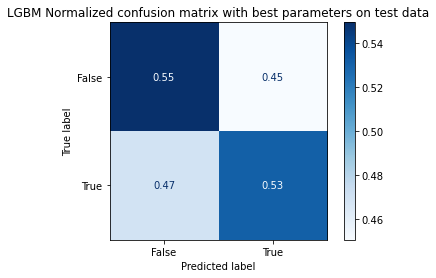

## Introduction

Next week

Report:

introduction. 

Methods

Wrangling- describe manipulation and data changes

Exploration - talk about the important features 
3 important one, 3 non important ones
show distributions
ivariate chart showing releation between them
statistical tests of significance
important freatures have strong variation  with target var

Modeling: discussion on each model, with summary of advs and disadvs of each model, assumptions 
Don't have to show the grid seach fro every model, just show a table for each: (performance, training time,) a chart showing perf on training and on test set
Show chart with final perf on test set.

Discussion:
Explain the choices made in the analysis
Most important is to describe shortcomings of the data and analysis-room for improvement. Weaknesses/ limitations in the model. Show readers where the model and analysis can be improved.  


EDA: group categories with high-ratio and low-ratio, instead of having hundreds of categories.

Make a plot n_sample for training, as a function of performance on the validation (always use the same test set). Look for a convergence of the performance after reaching sufficne samples. Use the best hyperparameters, not a grid search. (Try decision tree first, because it's fast.


# Modelling, with pipelines

In [ ]:
# Import FeatureUnion
from sklearn.pipeline import FeatureUnion

# Combine the numeric and categorical transformations
numeric_categorical_union = FeatureUnion([
                                          ("num_mapper", numeric_imputation_mapper),
                                          ("cat_mapper", categorical_imputation_mapper)
                                         ])

NameError: ignored